In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input,Dense,GlobalMaxPool1D,LSTM,Embedding
from tensorflow.keras.models import Model

In [18]:
df=pd.read_csv("spam.csv",encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [19]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [20]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df.columns=['labels','data']

In [27]:
df.drop("blabels",inplace=True,axis=1)
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [28]:
df['b_labels']=df['labels'].map({'ham':0,'spam':1})
Y=df['b_labels'].values
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [29]:
x_train,x_test,y_train,y_test=train_test_split(df['data'],Y,test_size=0.33)

In [31]:
#converting sentences into sequences
MAX_VOCAB_SIZE=20000
tokenizer=Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x_train)
sequences_train=tokenizer.texts_to_sequences(x_train)
sequences_test=tokenizer.texts_to_sequences(x_test)

In [36]:
#word to idx
word2idx=tokenizer.word_index
V= len(word2idx)
print(f"found {V} unique tokens")

found 7227 unique tokens


In [41]:
#pad sequences so that we get NxT matrix
data_train=pad_sequences(sequences_train)
print("shape of data train: ",data_train.shape)
#get sequence length
T=data_train.shape[1]

shape of data train:  (3733, 189)


In [43]:
data_test=pad_sequences(sequences_test,maxlen=T)
print("shape of data test: ",data_test.shape)

shape of data test:  (1839, 189)


In [45]:
#create the model
#we get to choose embedding dimensionality
D=20
#hidden state dimensionality
M=15

#note:we actually want to size of the embedding to (V+1)xd,
#because the first index start from 1 not 0
#thus if the final index of embedding matrix is V
#the actally it must have the size of V+1
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=LSTM(M,return_sequences=True)(x)
x=GlobalMaxPool1D()(x)
x=Dense(1,activation='sigmoid')(x)
model=Model(i,x)

In [46]:
#compile and fit
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [49]:
r=model.fit(data_train,y_train,epochs=15,validation_data=(data_test,y_test))

Epoch 1/15
117/117 [==============================] - 11s 83ms/step - loss: 0.4519 - accuracy: 0.8661 - val_loss: 0.3345 - val_accuracy: 0.8641
Epoch 2/15
117/117 [==============================] - 9s 76ms/step - loss: 0.2584 - accuracy: 0.8669 - val_loss: 0.2029 - val_accuracy: 0.8641
Epoch 3/15
117/117 [==============================] - 9s 75ms/step - loss: 0.1657 - accuracy: 0.9719 - val_loss: 0.1359 - val_accuracy: 0.9853
Epoch 4/15
117/117 [==============================] - 10s 82ms/step - loss: 0.1050 - accuracy: 0.9909 - val_loss: 0.1001 - val_accuracy: 0.9853
Epoch 5/15
117/117 [==============================] - 9s 77ms/step - loss: 0.0660 - accuracy: 0.9962 - val_loss: 0.0738 - val_accuracy: 0.9886
Epoch 6/15
117/117 [==============================] - 9s 76ms/step - loss: 0.0444 - accuracy: 0.9971 - val_loss: 0.0631 - val_accuracy: 0.9880
Epoch 7/15
117/117 [==============================] - 9s 74ms/step - loss: 0.0311 - accuracy: 0.9981 - val_loss: 0.0566 - val_accuracy: 0.98

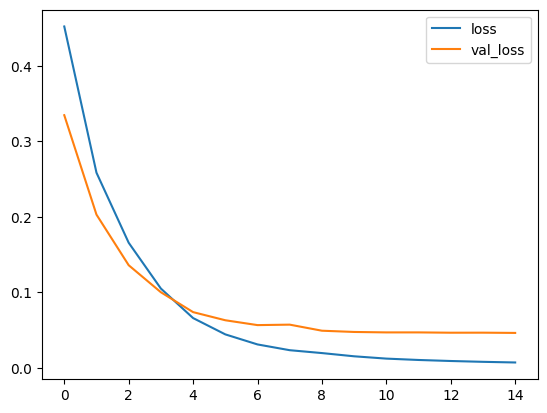

In [53]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

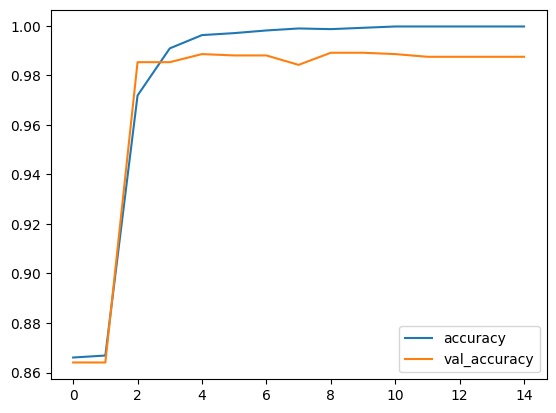

In [54]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()